In [1]:
import numpy as np
import os, sys

project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.models import MOSFETModel
from src.extraction import ModelExtractor
from src.visualization import plot_mosfet_fit, plot_mosfet_multi

from scipy.constants import k as k_B, e as q_e
import matplotlib.pyplot as plt

## Id-Vg Single-Curve Fit Demo

True params: {'V_th': 0.67, 'k_n': 0.0005, 'lam': 0.02, 'V_ds': 1.0}
Fitted params: {'V_th': np.float64(0.6702221826934861), 'k_n': np.float64(0.0004989201744563989), 'lam': np.float64(0.017489313724997665), 'V_ds': 1.0}
RMS err: 0.021148567586810673


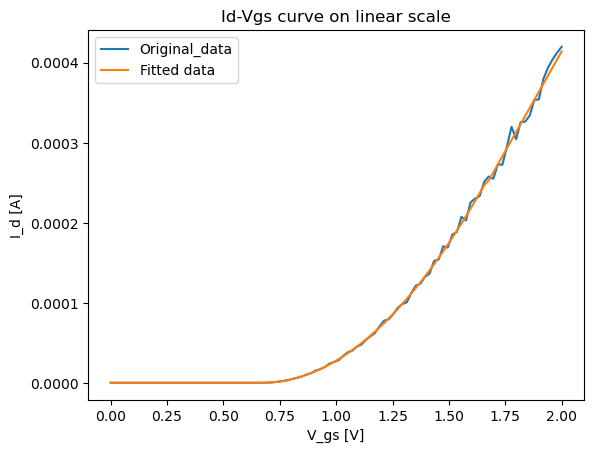

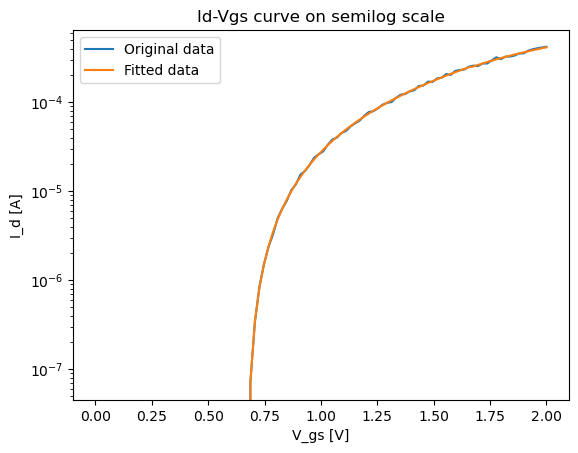

In [2]:
model = MOSFETModel()
extractor = ModelExtractor(model)

true_params = {
    'V_th': 0.67,
    'k_n': 5e-4,
    'lam': 0.02,
    'V_ds': 1.0
}

V_gs = np.linspace(0, 2, 100)
I_true = model.compute_current(V_gs, true_params)

np.random.seed(67)
I_noise = I_true * (1 + np.random.normal(0, 0.03, size=I_true.shape))

report = extractor.mosfet_fit(V_gs, I_noise, V_ds=true_params['V_ds'])
fit = report['parameters']

print("True params:", true_params)
print("Fitted params:", fit)
print("RMS err:", report['rms_err'])

plot_mosfet_fit(V_gs, I_noise, model, fit, None, 'linear')
plot_mosfet_fit(V_gs, I_noise, model, fit, None, 'log')


## Id-Vg Multi-Curve Fit Demo

True params: {'V_th': 0.67, 'k_n': 0.0005, 'lam': 0.02, 'V_ds': 1.0}
Fitted params: {'V_th': np.float64(0.6699439149764755), 'k_n': np.float64(0.0004932998839389962), 'lam': np.float64(0.02787243998602007)}
RMS err: 0.030602835862201184


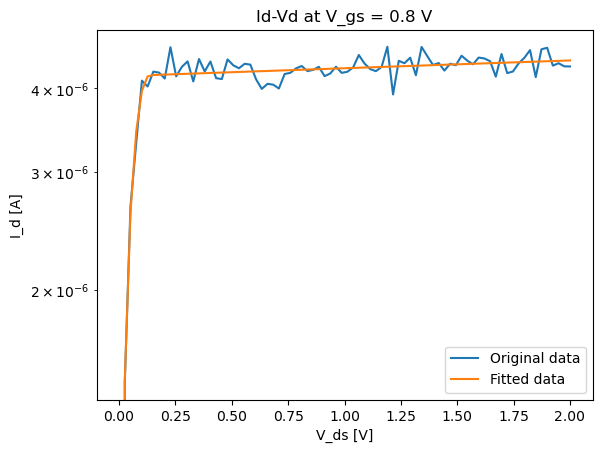

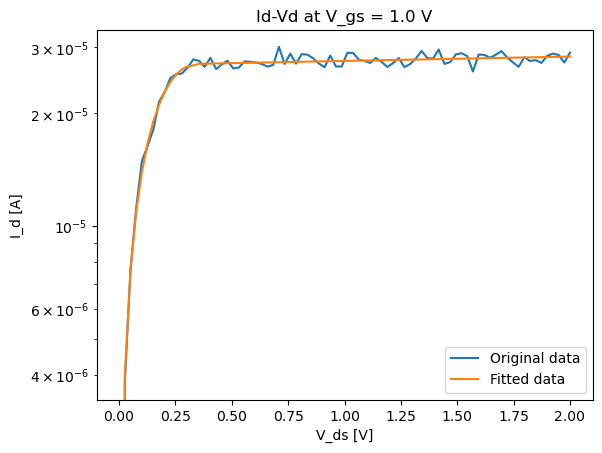

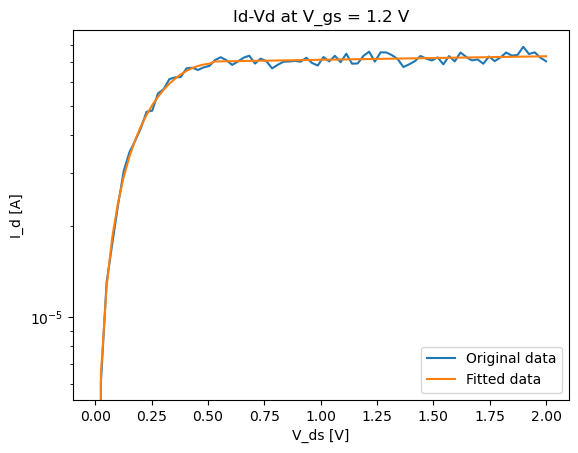

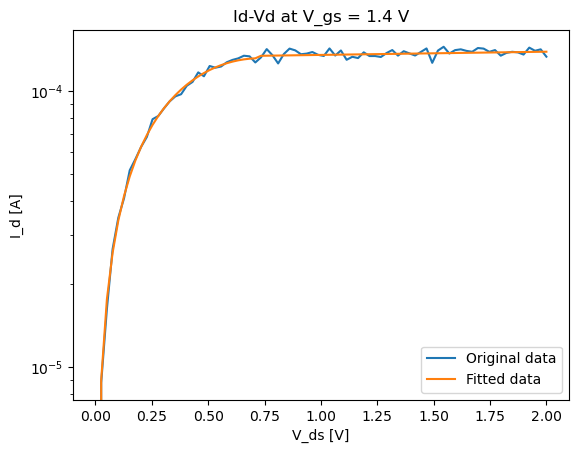

In [3]:
Vds_sweep = np.linspace(0, 2, 80)
Vgs_sweep = [0.8, 1.0, 1.2, 1.4]
datasets = []

np.random.seed(12)
for vgs in Vgs_sweep:
    params = {
        'V_th': true_params['V_th'],
        'k_n': true_params['k_n'],
        'lam': true_params['lam'],
        'V_ds': 0.0
    }
    
    vgs_array = np.full_like(Vds_sweep, vgs)
    I_true = model.compute_current(vgs_array, {**params, 'V_ds': Vds_sweep})
    I_data = I_true * (1 + np.random.normal(0, 0.03, size=I_true.shape))
    datasets.append((Vds_sweep, I_data, vgs))
    
report = extractor.multi_mosfet_fit(datasets)
fit = report['parameters']

print("True params:", true_params)
print("Fitted params:", fit)
print("RMS err:", report['rms_err'])

for Vds, I_data, vgs in datasets:
    vgs_array = np.full_like(Vds, vgs)
    fitted_params = {
        'V_th': fit['V_th'],
        'k_n': fit['k_n'],
        'lam': fit['lam'],
        'vgs_array': vgs_array
    }
    
    plot_mosfet_multi(Vds, I_data, model, fitted_params, V_gs_label=vgs)

